# Test de código para obtener los valores cuota de una estrategia

### Paso 0. Para obtener los valores de una estrategia, primero tenemos que crear las estrategias

In [6]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import sys
sys.path.append("../")

from src import Estrategia, generate_df_valores_cuota


#Cargar base de días hábiles
dbpath = r'../processed_data/db_habiles.db'
conn_habiles = sqlite3.connect(dbpath)
df_dias_habiles = pd.read_sql('SELECT * FROM HABILES',
                         conn_habiles, parse_dates=['Fecha'])

# PARAMETROS PARA DEFINIR LA ESTRATEGIA
fecha_ini = datetime.datetime.strptime('2012-01-01', '%Y-%m-%d').date()
fecha_end = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d').date()


estrategia_ff = Estrategia(fecha_ini, fecha_end, 'FF', 'raw_data/anuncios_ff.xlsx')
estrategia_a = Estrategia(fecha_ini, fecha_end, 'A')

print(estrategia_ff)
print(estrategia_a)



Estrategia: FF
Fecha Inicio: 2012-01-01
Fecha Término: 2015-01-01

2012-01-01 - 2012-01-11 : [0, 0, 0, 0, 1.0]
2012-01-11 - 2012-03-29 : [1.0, 0, 0, 0, 0]
2012-03-29 - 2012-06-19 : [0, 0, 0, 0, 1.0]
...
2014-12-15 - 2015-01-01 : [0, 0, 0, 0, 1.0]

Estrategia: A
Fecha Inicio: 2012-01-01
Fecha Término: 2015-01-01

2012-01-01 - 2015-01-01 : [1, 0, 0, 0, 0]
2012-01-01 - 2015-01-01 : [1, 0, 0, 0, 0]



### Paso 1. Teniendo las estrategias creadas, podemos obtener la valorización de las cuotas correspondientes

In [10]:
# PARAMETROS BASE PARA BUSCAR LOS VALORES CUOTA

afp = 'HABITAT'
monto_inicial = 100

# ESTE PARÁMETRO PERMITE CONTROLAR 
# EL NÚMERO DE DÍAS DE REZAGO CON LOS QUE UNA PERSONA 
# INGRESA LA SOLICITUD DE CAMBIO DE FONDO 
# (ES RELEVANTE SOLO EN ESTRATEGIAS ACTIVAS...)

lag_solicitud = 1   


df_out = generate_df_valores_cuota(estrategia_ff, afp, monto_inicial, lag_solicitud, df_dias_habiles)

df_out

,Fecha,Val_FF_lag_1,CP_A,CP_B,CP_C,CP_D,CP_E
0,2012-01-01,100.000000,0.0,0.0,0.0,0.0,0.004129
1,2012-01-02,100.056200,0.0,0.0,0.0,0.0,0.004129
2,2012-01-03,100.101829,0.0,0.0,0.0,0.0,0.004129
3,2012-01-04,100.105917,0.0,0.0,0.0,0.0,0.004129
4,2012-01-05,100.216996,0.0,0.0,0.0,0.0,0.004129
...,...,...,...,...,...,...,...
1011,2014-12-28,132.459716,0.0,0.0,0.0,0.0,0.004264
1012,2014-12-29,132.495830,0.0,0.0,0.0,0.0,0.004264
1013,2014-12-30,132.504060,0.0,0.0,0.0,0.0,0.004264
1014,2014-12-31,132.647240,0.0,0.0,0.0,0.0,0.004264


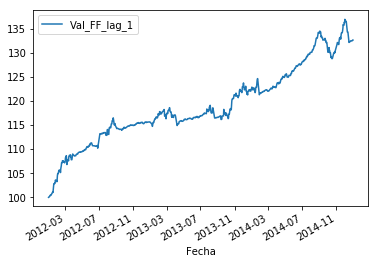

In [11]:
df_out = df_out.set_index('Fecha')
df_out[['Val_FF_lag_1']].plot()
plt.show()

In [12]:
df_out2 = generate_df_valores_cuota(estrategia_a, afp, monto_inicial, lag_solicitud, df_dias_habiles)

df_out2

,Fecha,Val_A_lag_1,CP_A,CP_B,CP_C,CP_D,CP_E
0,2012-01-01,100.000000,0.003986,0.0,0.0,0.0,0.0
1,2012-01-02,99.928964,0.003986,0.0,0.0,0.0,0.0
2,2012-01-03,99.929761,0.003986,0.0,0.0,0.0,0.0
3,2012-01-04,100.813092,0.003986,0.0,0.0,0.0,0.0
4,2012-01-05,100.834698,0.003986,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1092,2014-12-28,136.444175,0.003986,0.0,0.0,0.0,0.0
1093,2014-12-29,136.529363,0.003986,0.0,0.0,0.0,0.0
1094,2014-12-30,136.827182,0.003986,0.0,0.0,0.0,0.0
1095,2014-12-31,136.558583,0.003986,0.0,0.0,0.0,0.0


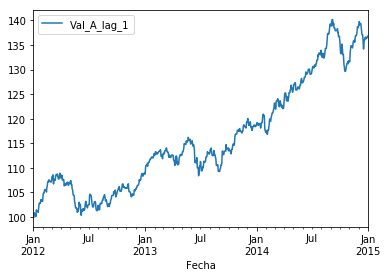

In [13]:
df_out2 = df_out2.set_index('Fecha')
df_out2[['Val_A_lag_1']].plot()
plt.show()